## Import Library Needed

In [130]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

## Load Data

In [131]:
with open('[file kamu]', 'r', encoding='unicode_escape') as myfile:
    mytext = myfile.read()

In [132]:
mytext

'Jorginho Hindarkan Italia dari Kekalahan\njorginho adalah pemain italia dan jorginho adalah orang. Italia bermain imbang dengan Polandia pada laga UEFA Nations League Liga A Grup 3 yang berlangsung di Stadion Renato DallAra, Bologna. Italia tertinggal terlebih dahulu sebelum menyamakan kedudukan melalui tendangan penalti Jorginho.\nPolandia membuka ancaman ketika laga baru berjalan enam menit. Penjagaan yang yang tidak ketat membuat Piotr Zielinski mendapatkan ruang untuk menendang bola, namun Gianluigi Donnarumam masih berhasil menghalau bola.\nLini pertahanan Italia terus diuji. Pada menit ke-26, Grzegorz Krychowiak yang mengancam gawang Gli Azzurri. Lagi-lagi, Donnarumma menunjukkan aksi penyelamatan.\nItalia mencoba balik mengancam pada menit ke-37 melalui Federico Bernardeschi. Tetapi, bola hasil tendangannya masih menyamping dari gawang Polandia yang dikawal Lukasz Fabianski.\nPada menit ke-40, Zielinski mengantarkan Polandia memimpin. Tendangan first time Zielinski membobol gaw

## Preprocessing

In [133]:
my_tokenizer = Tokenizer()
my_tokenizer.fit_on_texts([mytext])
total_words = len(my_tokenizer.word_index) + 1

In [134]:
my_tokenizer.word_index

{'di': 1,
 'yang': 2,
 'dan': 3,
 'ini': 4,
 'untuk': 5,
 'dari': 6,
 'dengan': 7,
 'akan': 8,
 '2018': 9,
 'itu': 10,
 'pada': 11,
 'dalam': 12,
 'indonesia': 13,
 'saya': 14,
 'tidak': 15,
 'juga': 16,
 'menjadi': 17,
 'bisa': 18,
 'kami': 19,
 'ke': 20,
 'tersebut': 21,
 'saat': 22,
 'lebih': 23,
 'dia': 24,
 'tahun': 25,
 'sudah': 26,
 'seperti': 27,
 'mereka': 28,
 'ada': 29,
 'kata': 30,
 'karena': 31,
 'para': 32,
 '9': 33,
 'adalah': 34,
 'oleh': 35,
 'atau': 36,
 'orang': 37,
 'sebagai': 38,
 'games': 39,
 'ia': 40,
 'kita': 41,
 'haji': 42,
 'tim': 43,
 'hal': 44,
 'bahasa': 45,
 'tak': 46,
 'telah': 47,
 'memiliki': 48,
 'masih': 49,
 'satu': 50,
 'kepada': 51,
 'baik': 52,
 'anak': 53,
 'lalu': 54,
 'harus': 55,
 'hanya': 56,
 'jadi': 57,
 'asian': 58,
 'jemaah': 59,
 'rumah': 60,
 'rossi': 61,
 '1': 62,
 'september': 63,
 'mengatakan': 64,
 'beberapa': 65,
 'banyak': 66,
 'setelah': 67,
 'waktu': 68,
 'atlet': 69,
 'hari': 70,
 'pemain': 71,
 'laga': 72,
 'pemerintah': 73,

In [185]:
my_input_sequences = []
for line in mytext.split('\n'):
    # print(line)
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

[875, 2543, 350, 6, 630]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543, 11, 72, 1040, 876, 385, 253, 631, 1041, 326, 2, 483, 1, 544, 2544, 2545, 2546, 350, 1042, 1043, 1707, 189, 1263, 738, 125, 877, 739, 875]
[543, 386, 1708, 144, 72, 100, 632, 740, 90, 2547, 2, 2, 15, 1709, 109, 2548, 1264, 149, 741, 5, 2549, 206, 79, 2550, 2551, 49, 305, 2552, 206]
[484, 633, 350, 306, 2553, 11, 90, 20, 878, 2554, 2555, 2, 1710, 387, 2556, 2557, 87, 87, 1711, 280, 879, 2558]
[350, 634, 1044, 1710, 11, 90, 20, 1265, 125, 2559, 1712, 388, 206, 174, 2560, 49, 2561, 6, 387, 543, 2, 2562, 2563, 1713]
[11, 90, 20, 635, 1264, 1714, 543, 1045, 877, 2564, 2565, 1264, 1266, 387, 1711, 543, 75, 742, 50, 281, 11, 545, 82]
[636, 545, 150, 350, 634, 1715, 1712, 126, 1716, 227, 5, 880, 281, 2566, 11, 90, 20, 1717, 151, 546, 881]
[11, 90, 20, 1046, 350, 389, 877, 739, 67, 2567, 2568, 190, 1267, 1, 1268, 633, 543, 875, 2, 17, 2569, 305, 2570, 1713, 3, 109, 738, 17, 737]
[637, 62, 62, 17, 174, 327, 72, 145

In [148]:
my_input_sequences = []
for line in mytext.split('\n'):
    # print(line)
    token_list = my_tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        print(my_n_gram_sequence)
        my_input_sequences.append(my_n_gram_sequence)
        # print(input_sequences)

[875, 2543]
[875, 2543, 350]
[875, 2543, 350, 6]
[875, 2543, 350, 6, 630]
[875, 34]
[875, 34, 71]
[875, 34, 71, 350]
[875, 34, 71, 350, 3]
[875, 34, 71, 350, 3, 875]
[875, 34, 71, 350, 3, 875, 34]
[875, 34, 71, 350, 3, 875, 34, 37]
[875, 34, 71, 350, 3, 875, 34, 37, 350]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543, 11]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543, 11, 72]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543, 11, 72, 1040]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543, 11, 72, 1040, 876]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543, 11, 72, 1040, 876, 385]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543, 11, 72, 1040, 876, 385, 253]
[875, 34, 71, 350, 3, 875, 34, 37, 350, 252, 737, 7, 543, 11, 72, 1040, 876,

In [149]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))

In [150]:
input_sequences

array([[   0,    0,    0, ...,    0,  875, 2543],
       [   0,    0,    0, ...,  875, 2543,  350],
       [   0,    0,    0, ..., 2543,  350,    6],
       ...,
       [   0,    0,    0, ...,  841,  113,  545],
       [   0,    0,    0, ...,  113,  545,  150],
       [   0,    0,    0, ...,  545,  150,  391]])

In [151]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [158]:
X[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [159]:
y[2]

6

In [160]:
X

array([[   0,    0,    0, ...,    0,    0,  875],
       [   0,    0,    0, ...,    0,  875, 2543],
       [   0,    0,    0, ...,  875, 2543,  350],
       ...,
       [   0,    0,    0, ...,  312,  841,  113],
       [   0,    0,    0, ...,  841,  113,  545],
       [   0,    0,    0, ...,  113,  545,  150]])

In [161]:
y

array([2543,  350,    6, ...,  545,  150,  391])

In [162]:
# lakukan one hot encoding
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [163]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [164]:
y[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Define Models

In [166]:
model = tf.keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 386, 100)          494300    
                                                                 
 lstm_4 (LSTM)               (None, 150)               150600    
                                                                 
 dense_4 (Dense)             (None, 4943)              746393    
                                                                 
Total params: 1,391,293
Trainable params: 1,391,293
Non-trainable params: 0
_________________________________________________________________
None


In [168]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
hist = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
740/740 [==============================] - 44s 48ms/step - loss: 7.6498 - accuracy: 0.0234
Epoch 2/100
740/740 [==============================] - 35s 47ms/step - loss: 7.1835 - accuracy: 0.0302
Epoch 3/100
740/740 [==============================] - 34s 46ms/step - loss: 6.8407 - accuracy: 0.0414
Epoch 4/100
740/740 [==============================] - 34s 47ms/step - loss: 6.3656 - accuracy: 0.0602
Epoch 5/100
740/740 [==============================] - 34s 46ms/step - loss: 5.8151 - accuracy: 0.0859
Epoch 6/100
740/740 [==============================] - 34s 46ms/step - loss: 5.2534 - accuracy: 0.1231
Epoch 7/100
740/740 [==============================] - 34s 46ms/step - loss: 4.7177 - accuracy: 0.1734
Epoch 8/100
740/740 [==============================] - 34s 46ms/step - loss: 4.2107 - accuracy: 0.2342
Epoch 9/100
740/740 [==============================] - 34s 46ms/step - loss: 3.7332 - accuracy: 0.3138
Epoch 10/100
740/740 [==============================] - 34s 46ms/step - l

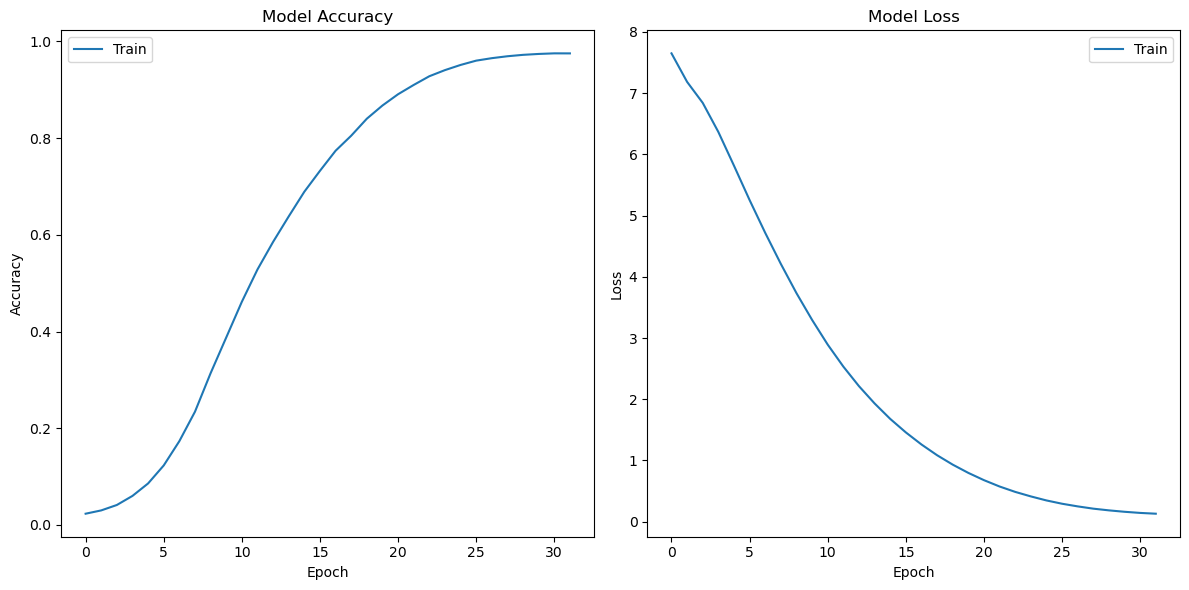

In [170]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Make Prediction

In [173]:
model_loaded = load_model("mymodel.h5")

In [175]:
import numpy as np

input_text = "jokowi"
predict_next_words = 5

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predictions = model_loaded.predict(token_list)[0]
    
    # Get indices of top predicted words
    top_indices = np.argsort(predictions)[-5:][::-1]  # Adjust 5 to the number of top words you want
    
    # Get words corresponding to the indices
    next_words = [word for word, index in my_tokenizer.word_index.items() if index in top_indices]
    
    # Print the list of next words along with their probabilities
    print("Input Text:", input_text)
    print("Next Words and Probabilities:")
    for word, index in zip(next_words, top_indices):
        probability = predictions[index]
        print(f"{word}: {probability:.4f}")
    
    # Choose the word with the highest probability as the next word
    output_word = my_tokenizer.index_word[top_indices[0]]
    
    input_text += " " + output_word

print(input_text)

Input Text: jokowi
Next Words and Probabilities:
dan: 0.4547
itu: 0.2034
atau: 0.0836
ma: 0.0415
sendiri: 0.0385
Input Text: jokowi itu
Next Words and Probabilities:
sebagai: 0.4264
mengaku: 0.1164
tentu: 0.0737
muhibbah: 0.0663
diperkirakan: 0.0559
Input Text: jokowi itu tentu
Next Words and Probabilities:
untuk: 0.8630
dengan: 0.1265
sebagai: 0.0021
dapat: 0.0020
saja: 0.0016
Input Text: jokowi itu tentu saja
Next Words and Probabilities:
dengan: 0.6657
akan: 0.1624
saya: 0.1006
bisa: 0.0343
dapat: 0.0056
Input Text: jokowi itu tentu saja dengan
Next Words and Probabilities:
melalui: 0.4094
persib: 0.1276
ekonomi: 0.0891
mudah: 0.0625
kekayaan: 0.0441
jokowi itu tentu saja dengan mudah


In [191]:
input_text = "akan sangat membantu"
predict_next_words = 10

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model_loaded.predict(token_list), axis=-1)
    output_word = ""
    for word, index in my_tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[8, 74, 677]
[8, 74, 677, 28]
[8, 74, 677, 28, 52]
[8, 74, 677, 28, 52, 5]
[8, 74, 677, 28, 52, 5, 252]
[8, 74, 677, 28, 52, 5, 252, 2051]
[8, 74, 677, 28, 52, 5, 252, 2051, 20]
[8, 74, 677, 28, 52, 5, 252, 2051, 20, 2050]
[8, 74, 677, 28, 52, 5, 252, 2051, 20, 2050, 3]
[8, 74, 677, 28, 52, 5, 252, 2051, 20, 2050, 3, 2048]
akan sangat membantu mereka baik untuk bermain kalinya ke vatikan dan berjumpa paus


## Save Model

In [192]:
model.save("mymodel.h5")

## Load Model

In [193]:
model_loaded = load_model("mymodel.h5")

In [194]:
input_text = "Pameran"
predict_next_words = 15

for _ in range(predict_next_words):
    token_list = my_tokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model_loaded.predict(token_list), axis=-1)
    output_word = ""
    for word, index in my_tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[1290]
[1290, 4514]
[1290, 4514, 4514]
[1290, 4514, 4514, 4514]
[1290, 4514, 4514, 4514, 151]
[1290, 4514, 4514, 4514, 151, 151]
[1290, 4514, 4514, 4514, 151, 151, 2067]
[1290, 4514, 4514, 4514, 151, 151, 2067, 2067]
[1290, 4514, 4514, 4514, 151, 151, 2067, 2067, 736]
[1290, 4514, 4514, 4514, 151, 151, 2067, 2067, 736, 2753]
[1290, 4514, 4514, 4514, 151, 151, 2067, 2067, 736, 2753, 2980]
[1290, 4514, 4514, 4514, 151, 151, 2067, 2067, 736, 2753, 2980, 2980]
[1290, 4514, 4514, 4514, 151, 151, 2067, 2067, 736, 2753, 2980, 2980, 1468]
[1290, 4514, 4514, 4514, 151, 151, 2067, 2067, 736, 2753, 2980, 2980, 1468, 393]
[1290, 4514, 4514, 4514, 151, 151, 2067, 2067, 736, 2753, 2980, 2980, 1468, 393, 551]
Pameran 29 29 29 belum belum diawali diawali brunei membudidayakan walaupun walaupun supaya kepala memenangkan jelas
